In [33]:
import pandas as pd

In [34]:
from fbprophet import Prophet

In [35]:
SYMBOL = 'INFY.BO'
INTERVAL = '1min'
API_KEY = 'VJOJOA8WIN0QEPCF'

In [36]:
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={SYMBOL}&interval={INTERVAL}&apikey={API_KEY}&datatype=csv'

In [37]:
df = pd.read_csv(url)

In [38]:
df.head()

,timestamp,open,high,low,close,volume
0,2020-06-15 00:08:01,698.10,698.10,698.1,698.1,0
1,2020-06-15 00:07:00,699.00,699.00,698.0,698.0,419
2,2020-06-15 00:06:00,699.30,699.45,698.7,699.0,247
3,2020-06-15 00:05:00,698.55,699.30,698.4,699.3,1429
4,2020-06-15 00:04:00,700.05,700.30,698.4,698.4,1178


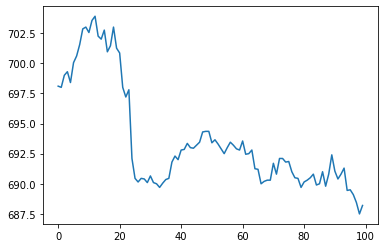

In [39]:
df['close'].plot()

In [40]:
df['tomo_gain'] = df['close'].shift(-1) - df['close']
df['yday_gain'] = df['tomo_gain'].shift(1)
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,timestamp,open,high,low,close,volume,tomo_gain,yday_gain
0,2020-06-15 00:07:00,699.00,699.00,698.00,698.00,419,1.00,-0.10
1,2020-06-15 00:06:00,699.30,699.45,698.70,699.00,247,0.30,1.00
2,2020-06-15 00:05:00,698.55,699.30,698.40,699.30,1429,-0.90,0.30
3,2020-06-15 00:04:00,700.05,700.30,698.40,698.40,1178,1.65,-0.90
4,2020-06-15 00:03:00,700.30,700.75,699.35,700.05,912,0.55,1.65


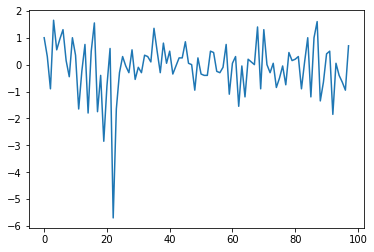

In [41]:
df['tomo_gain'].plot()

In [42]:
df['pct'] = df['close'].pct_change()

In [43]:
df.describe()

,open,high,low,close,volume,tomo_gain,yday_gain,pct
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,97.000000
mean,693.615306,694.133265,693.099082,693.640306,1062.520408,-0.100000,-0.108163,-0.000155
std,4.331183,4.445067,4.148022,4.348573,1099.068783,1.010333,1.007029,0.001453
min,688.350000,688.350000,687.500000,687.500000,0.000000,-5.700000,-5.700000,-0.008169
25%,690.450000,691.000000,690.062500,690.450000,343.500000,-0.437500,-0.437500,-0.000640
50%,692.275000,692.575000,691.750000,692.200000,723.500000,0.050000,0.025000,0.000072
75%,694.300000,694.637500,693.387500,694.337500,1341.750000,0.487500,0.450000,0.000652
max,703.900000,704.100000,702.650000,703.900000,5599.000000,1.650000,1.650000,0.002363


In [44]:
ctr = 0 
ctrcapture = 0
mins = 100
for i in df['pct'].values:
    if i < mins:
        mins = i
        ctrcapture = ctr
    ctr += 1
print(mins, ctrcapture)

-0.008168529664660307 23


In [45]:
print(df['pct'].values)

[            nan  1.43266476e-03  4.29184549e-04 -1.28700129e-03
  2.36254296e-03  7.85658167e-04  1.35598059e-03  1.85303970e-03
  2.13416803e-04 -6.40113798e-04  1.42338624e-03  4.97477081e-04
 -2.34408297e-03 -3.55998576e-04  1.06837607e-03 -2.56136606e-03
  7.13317640e-04  2.20970846e-03 -2.48933144e-03 -5.70409982e-04
 -4.06649069e-03 -1.14613181e-03  8.60585198e-04 -8.16852966e-03
 -2.38404855e-03 -4.34499240e-04  4.34688111e-04 -7.24165399e-05
 -4.34530707e-04  7.96985944e-04 -7.96351263e-04 -1.44906535e-04
 -4.34782609e-04  5.07467015e-04  4.34751105e-04  1.44854060e-04
  1.95524658e-03  7.22752241e-04 -4.33338148e-04  1.15606936e-03
  7.21709007e-05  7.21656924e-04 -5.04795558e-04 -7.21500722e-05
  3.60776391e-04  3.60646278e-04  1.22575528e-03  7.20149791e-05
  0.00000000e+00 -1.36818607e-03  3.60542256e-04 -5.04577236e-04
 -5.76950815e-04 -5.77283879e-04  7.22021661e-04  6.49350649e-04
 -3.60516259e-04 -4.32775534e-04 -1.44320970e-04  1.08256351e-03
 -1.58604282e-03  7.22073

In [46]:
actions = []
ctrs = []

In [47]:
prev = []
ctr = 0
for i in df['pct'].values:
    if len(prev) >=10:
        sums = 0
        for j in prev:
            sums = sums + j
        if sums < -0.000318:
            ctrs.append(ctr)
            actions.append(1)
        elif sums > 0.00041:
            ctrs.append(ctr)
            actions.append(0)
        else:
            ctrs.append(ctr)
            actions.append(3)
        prev.pop(0)
    ctr +=1

    prev.append(i)

In [48]:
import plotly.express as px

In [49]:
import psutil
fig = px.line(df, y='close')
img_bytes = fig.to_image(format='png')

In [50]:
def calcprofit():
    port = 1000
    init = 2000
    if actions[-1] == 1 and actions[-2]==1 and actions[-3]==1:
        pass

In [51]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

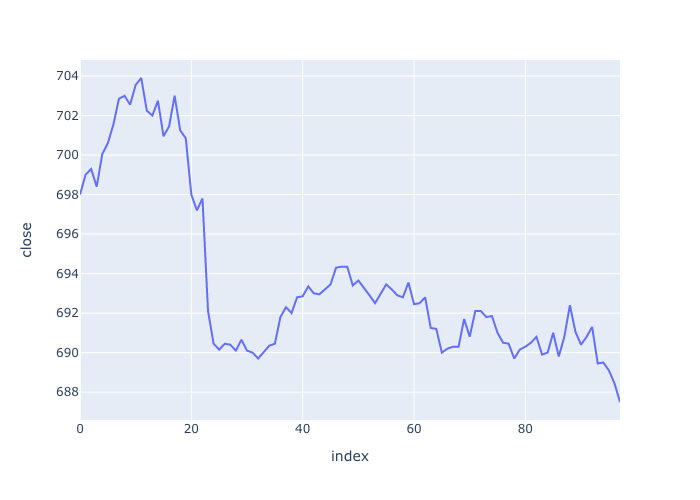

In [52]:
from IPython.display import Image
Image(img_bytes)

In [53]:
df.head()

,timestamp,open,high,low,close,volume,tomo_gain,yday_gain,pct
0,2020-06-15 00:07:00,699.00,699.00,698.00,698.00,419,1.00,-0.10,NaN
1,2020-06-15 00:06:00,699.30,699.45,698.70,699.00,247,0.30,1.00,0.001433
2,2020-06-15 00:05:00,698.55,699.30,698.40,699.30,1429,-0.90,0.30,0.000429
3,2020-06-15 00:04:00,700.05,700.30,698.40,698.40,1178,1.65,-0.90,-0.001287
4,2020-06-15 00:03:00,700.30,700.75,699.35,700.05,912,0.55,1.65,0.002363


In [65]:
propdf = pd.read_csv(f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=INFY.BO&apikey={API_KEY}&datatype=csv')

In [66]:
propdf

,timestamp,open,high,low,close,volume
0,2020-06-15,695.00,704.15,692.00,696.35,35681
1,2020-06-12,680.00,694.80,675.05,692.10,513795
2,2020-06-11,713.85,716.20,700.45,703.60,467025
3,2020-06-10,715.00,719.40,709.60,715.85,214885
4,2020-06-09,721.90,729.40,715.30,717.75,520552
...,...,...,...,...,...,...
95,2020-01-22,765.10,778.00,765.10,769.95,276071
96,2020-01-21,768.35,770.70,760.55,761.90,61778
97,2020-01-20,770.00,774.45,763.35,768.35,105542
98,2020-01-17,771.00,772.00,762.70,767.85,88333


In [92]:
anotherdf = df.copy()

In [93]:
anotherdf

,timestamp,open,high,low,close,volume,tomo_gain,yday_gain,pct
0,2020-06-15 00:07:00,699.00,699.00,698.00,698.00,419,1.00,-0.10,NaN
1,2020-06-15 00:06:00,699.30,699.45,698.70,699.00,247,0.30,1.00,0.001433
2,2020-06-15 00:05:00,698.55,699.30,698.40,699.30,1429,-0.90,0.30,0.000429
3,2020-06-15 00:04:00,700.05,700.30,698.40,698.40,1178,1.65,-0.90,-0.001287
4,2020-06-15 00:03:00,700.30,700.75,699.35,700.05,912,0.55,1.65,0.002363
...,...,...,...,...,...,...,...,...,...
93,2020-06-12 04:48:00,689.15,689.45,689.15,689.45,232,0.05,-1.85,-0.002676
94,2020-06-12 04:47:00,688.90,689.60,688.90,689.50,440,-0.40,0.05,0.000073
95,2020-06-12 04:46:00,688.85,689.10,688.70,689.10,59,-0.65,-0.40,-0.000580
96,2020-06-12 04:45:00,688.45,688.60,688.15,688.45,211,-0.95,-0.65,-0.000943


In [94]:
anotherdf = anotherdf.drop(columns=['open', 'high', 'low', 'volume', 'tomo_gain', 'yday_gain', 'pct'])

In [95]:
anotherdf

,timestamp,close
0,2020-06-15 00:07:00,698.00
1,2020-06-15 00:06:00,699.00
2,2020-06-15 00:05:00,699.30
3,2020-06-15 00:04:00,698.40
4,2020-06-15 00:03:00,700.05
...,...,...
93,2020-06-12 04:48:00,689.45
94,2020-06-12 04:47:00,689.50
95,2020-06-12 04:46:00,689.10
96,2020-06-12 04:45:00,688.45


In [96]:
anotherdf.columns = ['ds', 'y']

In [67]:
propdf = propdf.drop(columns=['open', 'high', 'low', 'volume'])

In [68]:
propdf['timestamp'] = pd.to_datetime(propdf['timestamp'])

In [69]:
propdf

,timestamp,close
0,2020-06-15,696.35
1,2020-06-12,692.10
2,2020-06-11,703.60
3,2020-06-10,715.85
4,2020-06-09,717.75
...,...,...
95,2020-01-22,769.95
96,2020-01-21,761.90
97,2020-01-20,768.35
98,2020-01-17,767.85


In [70]:
propdf.columns = ['ds', 'y']

In [78]:
propdf.head()

,ds,y
0,2020-06-15,696.35
1,2020-06-12,692.10
2,2020-06-11,703.60
3,2020-06-10,715.85
4,2020-06-09,717.75


In [97]:
prediction_size = 1
train_df = anotherdf[:-prediction_size]

In [98]:
train_df

,ds,y
0,2020-06-15 00:07:00,698.00
1,2020-06-15 00:06:00,699.00
2,2020-06-15 00:05:00,699.30
3,2020-06-15 00:04:00,698.40
4,2020-06-15 00:03:00,700.05
...,...,...
92,2020-06-12 04:49:00,691.30
93,2020-06-12 04:48:00,689.45
94,2020-06-12 04:47:00,689.50
95,2020-06-12 04:46:00,689.10


In [99]:
m = Prophet()

In [100]:
m.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [101]:
future = m.make_future_dataframe(periods=prediction_size)

In [102]:
forecast = m.predict(future)

In [103]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-06-12 04:45:00,673.159755,688.986920,691.343432,673.159755,673.159755,17.051255,17.051255,17.051255,17.051255,17.051255,17.051255,0.0,0.0,0.0,690.211010
1,2020-06-12 04:46:00,672.913904,688.963557,691.328099,672.913904,672.913904,17.222632,17.222632,17.222632,17.222632,17.222632,17.222632,0.0,0.0,0.0,690.136536
2,2020-06-12 04:47:00,672.668052,688.978994,691.208142,672.668052,672.668052,17.409721,17.409721,17.409721,17.409721,17.409721,17.409721,0.0,0.0,0.0,690.077774
3,2020-06-12 04:48:00,672.422201,688.833334,691.109985,672.422201,672.422201,17.611785,17.611785,17.611785,17.611785,17.611785,17.611785,0.0,0.0,0.0,690.033987
4,2020-06-12 04:49:00,672.176350,688.915154,691.201260,672.176350,672.176350,17.828091,17.828091,17.828091,17.828091,17.828091,17.828091,0.0,0.0,0.0,690.004441


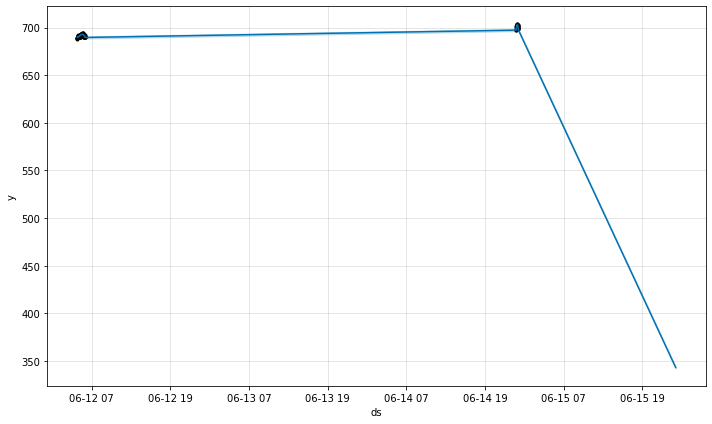

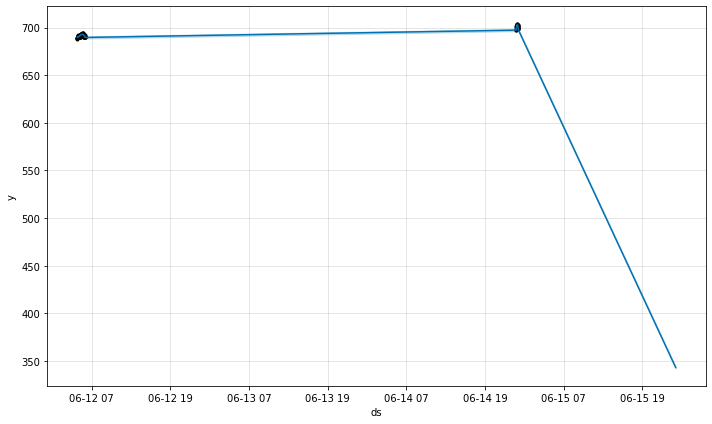

In [104]:
m.plot(forecast)

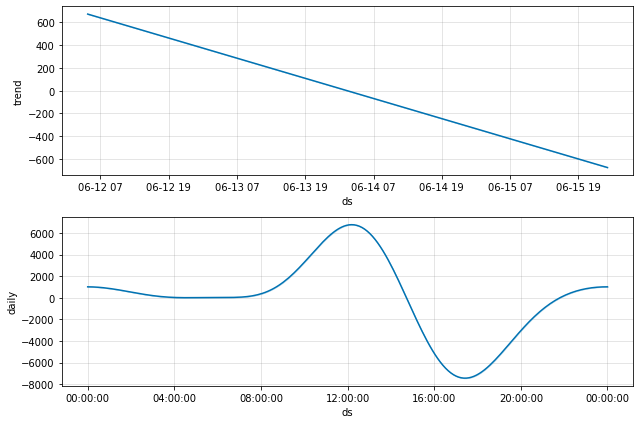

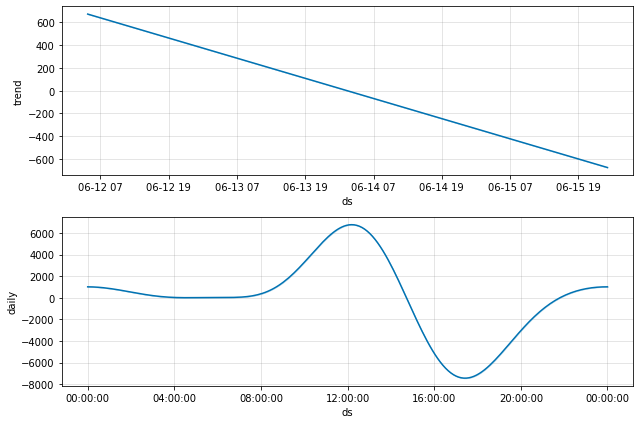

In [105]:
m.plot_components(forecast)

In [ ]:
import jovian

In [ ]:
jovian.commit()